Epoch 1/5


2023-03-03 22:11:26.160111: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1874/1875 [============================>.] - ETA: 0s - loss: 0.3981 - accuracy: 0.8563

2023-03-03 22:11:42.377550: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 9ms/step - loss: 0.3980 - accuracy: 0.8563 - val_loss: 0.2963 - val_accuracy: 0.8944
Epoch 2/5
1875/1875 [==============================] - 18s 9ms/step - loss: 0.2596 - accuracy: 0.9051 - val_loss: 0.2571 - val_accuracy: 0.9046
Epoch 3/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2106 - accuracy: 0.9242 - val_loss: 0.2530 - val_accuracy: 0.9116
Epoch 4/5
1875/1875 [==============================] - 18s 10ms/step - loss: 0.1726 - accuracy: 0.9368 - val_loss: 0.2527 - val_accuracy: 0.9136
Epoch 5/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1409 - accuracy: 0.9487 - val_loss: 0.2707 - val_accuracy: 0.9122
313/313 - 1s - loss: 0.2707 - accuracy: 0.9122 - 1s/epoch - 4ms/step
Test accuracy: 0.9122000336647034
Time elapsed:  87.85734486579895


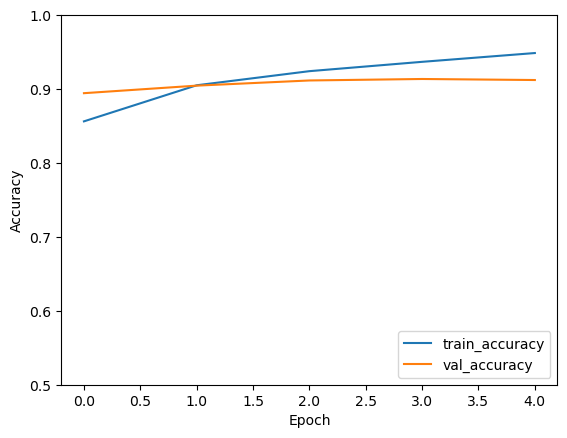

In [2]:
import tensorflow as tf
import numpy as np
import time
import matplotlib.pyplot as plt

# Load and preprocess the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
train_images = train_images.reshape((60000, 28, 28, 1)) # modify input shape to include channel dimension
train_images = train_images / 255.0
test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images / 255.0

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),  # add flattening layer
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
start_time = time.time()
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
end_time = time.time()

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('Test accuracy:', test_acc)
print('Time elapsed: ', end_time-start_time)

# Plot training history
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()
